Context
Amazon.com is one of the largest electronic commerce and cloud computing companies.

Just a few Amazon related facts

They lost $4.8 million in August 2013, when their website went down for 40 mins.<br>
They hold the patent on 1-Click buying, and licenses it to Apple.<br>
Their Phoenix fulfilment centre is a massive 1.2 million square feet.<br>
Amazon relies heavily on a Recommendation engine that reviews customer ratings and purchase history to recommend items and improve sales.

<b>Content</b><br>
This is a dataset related to over 2 Million customer reviews and ratings of Beauty related products sold on their website.

It contains

1. the unique UserId (Customer Identification),
2. the product ASIN (Amazon's unique product identification code for each product),
3. Ratings (ranging from 1-5 based on customer satisfaction) and
4. the Timestamp of the rating (in UNIX time)

<h1>Importing the libraries</h1>

In [3]:
ratings_amz=pd.read_csv("C:/Ketali/excel/ratings_Beauty.xlsx")
ratings_amz.head()


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
ratings_amz.shape

(2023070, 4)

In [94]:
ratings_amz.drop('Timestamp',axis=1,inplace=True)

In [95]:
ratings_amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
dtypes: float64(1), object(2)
memory usage: 46.3+ MB


In [96]:
rows,columns=ratings_amz.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  2023070
Number of columns:  3


In [97]:
##Check the datatypes
ratings_amz.dtypes

UserId        object
ProductId     object
Rating       float64
dtype: object

In [105]:
#Taking subset of the dataset
ratings_amz1=ratings_amz.iloc[1:50000,0:]
ratings_amz1

,UserId,ProductId,Rating
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0
5,AKJHHD5VEH7VG,0762451459,5.0
...,...,...,...
49995,A3368HBW326MI5,B00013YZS4,5.0
49996,A8YHT3VEHANEK,B00013Z0CE,1.0
49997,A2ONPKFN0G88F2,B00013Z0CE,5.0
49998,A1R1OYTFAZJFFX,B00013Z0CE,1.0


1. Since the data is very big. Consider electronics_df1 named dataframe with first 50000 rows and all columns from 0 of dataset.

In [106]:
ratings_amz1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 1 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserId     49999 non-null  object 
 1   ProductId  49999 non-null  object 
 2   Rating     49999 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [110]:
#Summary statistics of rating variable
ratings_amz1['Rating'].describe().transpose()

count    49999.000000
mean         4.159443
std          1.321533
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [112]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(ratings_amz1.Rating.min()))
print('Maximum rating is: %d' %(ratings_amz1.Rating.max()))


Minimum rating is: 1
Maximum rating is: 5


1. Rating are on the scale 1 to 5.

In [114]:
#Check for missing values
print('Number of missing values across columns: \n',ratings_amz1.isnull().sum())

Number of missing values across columns: 
 UserId       0
ProductId    0
Rating       0
dtype: int64


1.There are no missing records in the dataset.

D:\ketna\envs\tf_1.5\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


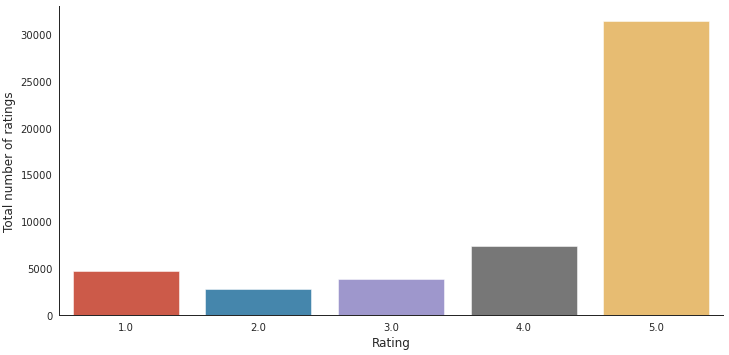

In [117]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=ratings_amz1, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 

We can see that more number of users have given the rating of 5

<h1>Users and products</h1>

In [122]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', ratings_amz1['UserId'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', ratings_amz1['ProductId'].nunique())

Number of unique users in Raw data =  47016
Number of unique product in Raw data =  2580


<h1>Taking the subset of dataset to make it less sparse/ denser.</h1>

In [136]:
#Check the top 10 users based on ratings
most_rated=ratings_amz1.groupby('UserId')['Rating'].count().sort_values(ascending=False)[:15]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 UserId
A281NPSIMI1C2R    42
A1Z54EM24Y40LL    25
A3M174IC0VXOS2    22
AK7CAW3N1XZV6     15
AKMEY1BSHSDG7     14
A1BG8QW55XHN6U    13
A2B7BUH8834Y6M    11
A1IU7S4HCK1XK0    10
A22VW0P4VZHDE3     9
A132ETQPMHQ585     9
A22ZFXQE8AWPEP     9
A3S3R88HA0HZG3     8
A2Y4S4CNGKF21S     8
A2H6SFTV2892Z8     8
A2F09EWKV3MTO2     7
Name: Rating, dtype: int64


In [139]:
counts=ratings_amz1.UserId.value_counts()
ratings_amz1_final=ratings_amz1[ratings_amz1.UserId.isin(counts[counts>=15].index)]
print('Number of users who have rated 25 or more items =', len(ratings_amz1_final))
print('Number of unique users in the final data = ', ratings_amz1_final['UserId'].nunique())
print('Number of unique products in the final data = ', ratings_amz1_final['ProductId'].nunique())

Number of users who have rated 25 or more items = 104
Number of unique users in the final data =  4
Number of unique products in the final data =  102


In [151]:
counts=ratings_amz1.UserId.value_counts()
counts

ratings_amz1_final=ratings_amz1[ratings_amz1.UserId.isin(counts[counts>=20].index)]
ratings_amz1_final

,UserId,ProductId,Rating
2348,A3M174IC0VXOS2,B00000JGVX,4.0
3977,A281NPSIMI1C2R,B000050B6X,5.0
4104,A281NPSIMI1C2R,B000050FET,5.0
4423,A281NPSIMI1C2R,B000052WYL,4.0
5597,A281NPSIMI1C2R,B000052Y33,5.0
...,...,...,...
46173,A3M174IC0VXOS2,B0000ZREXQ,5.0
49062,A281NPSIMI1C2R,B00012NEYG,5.0
49300,A281NPSIMI1C2R,B00012NK86,5.0
49400,A281NPSIMI1C2R,B00012URGE,5.0


1. ratings_amz1_final has the users who have rated 25 or more items.

<h2>Rating analysis in final dataset</h2>

In [152]:
#constructing the pivot table
final_ratings_matrix = ratings_amz1_final.pivot(index = 'UserId', columns ='ProductId', values = 'Rating').fillna(0)
final_ratings_matrix

ProductId,B00000JGVX,B000050B6X,B000050FET,B000052WYL,B000052Y33,B000052YKU,B000052YMQ,B000052Z8B,B000052ZB1,B000052ZSS,...,B0000WANB4,B0000Y3C4C,B0000Y3FQC,B0000Y3GIE,B0000YUVXC,B0000ZREXQ,B00012NEYG,B00012NK86,B00012URGE,B00013YYS0
UserId,,,,,,,,,,,,,,,,,,,,,
A1Z54EM24Y40LL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A281NPSIMI1C2R,0.0,5.0,5.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,5.0,0.0,5.0,5.0,5.0,5.0
A3M174IC0VXOS2,4.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,4.0,5.0,...,4.0,5.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0


1. It shows that it is a sparse matrix. So, many cells are filled with 0 values.

In [142]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (4, 102)


In [153]:
#Calucating the density of the rating marix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  89
possible_num_of_ratings =  261
density: 34.10%


<h1> Splitting the data</h1>

In [159]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(ratings_amz1_final, test_size = 0.3, random_state=0)
train_data.head()

,UserId,ProductId,Rating
39535,A3M174IC0VXOS2,B0000WANB4,4.0
41085,A3M174IC0VXOS2,B0000Y3GIE,3.0
4423,A281NPSIMI1C2R,B000052WYL,4.0
28583,A1Z54EM24Y40LL,B00006JN4Q,5.0
35819,A3M174IC0VXOS2,B0000AK9SV,4.0


In [160]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (62, 3)
Shape of testing data:  (27, 3)


<h1>Building Popularity Recommder model</h1>

In [163]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('ProductId').agg({'UserId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'UserId': 'score'},inplace=True)
train_data_grouped.head(40)


,ProductId,score
0,B00000JGVX,1
1,B000050B6X,1
2,B000052WYL,1
3,B000052Y33,1
4,B000052YKU,1
5,B000052ZSS,1
6,B000053037,1
7,B00005303A,1
8,B00005304H,1
9,B00005308B,1


In [164]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'ProductId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,ProductId,score,rank
12,B000053375,2,1.0
0,B00000JGVX,1,2.0
1,B000050B6X,1,3.0
2,B000052WYL,1,4.0
3,B000052Y33,1,5.0


In [166]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [167]:
find_recom = [10,100,150]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 


The list of recommendations for the userId: 10

    userId   ProductId  score  rank
12      10  B000053375      2   1.0
0       10  B00000JGVX      1   2.0
1       10  B000050B6X      1   3.0
2       10  B000052WYL      1   4.0
3       10  B000052Y33      1   5.0


The list of recommendations for the userId: 100

    userId   ProductId  score  rank
12     100  B000053375      2   1.0
0      100  B00000JGVX      1   2.0
1      100  B000050B6X      1   3.0
2      100  B000052WYL      1   4.0
3      100  B000052Y33      1   5.0


The list of recommendations for the userId: 150

    userId   ProductId  score  rank
12     150  B000053375      2   1.0
0      150  B00000JGVX      1   2.0
1      150  B000050B6X      1   3.0
2      150  B000052WYL      1   4.0
3      150  B000052Y33      1   5.0




Since, it is a Popularity recommender model, so, all the three users are given the same recommendations. Here, we predict the products based on the popularity. It is not personalized to particular user. It is a non-personalized recommender system.

<h1>Building Collaborative Filtering recommender model.</h1>

In [169]:
ratings_amz_CF = pd.concat([train_data, test_data]).reset_index()
ratings_amz.head()

,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0


<h2>User Based Collaborative Filtering model</h2>

In [172]:
# Matrix with row per 'user' and column per 'item' 
pivot_df = ratings_amz_CF.pivot(index = 'UserId', columns ='ProductId', values = 'Rating').fillna(0)
pivot_df.head()

ProductId,B00000JGVX,B000050B6X,B000050FET,B000052WYL,B000052Y33,B000052YKU,B000052YMQ,B000052Z8B,B000052ZB1,B000052ZSS,...,B0000WANB4,B0000Y3C4C,B0000Y3FQC,B0000Y3GIE,B0000YUVXC,B0000ZREXQ,B00012NEYG,B00012NK86,B00012URGE,B00013YYS0
UserId,,,,,,,,,,,,,,,,,,,,,
A1Z54EM24Y40LL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A281NPSIMI1C2R,0.0,5.0,5.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,5.0,0.0,5.0,5.0,5.0,5.0
A3M174IC0VXOS2,4.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,4.0,5.0,...,4.0,5.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0


In [173]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (3, 87)


In [174]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

ProductId,B00000JGVX,B000050B6X,B000050FET,B000052WYL,B000052Y33,B000052YKU,B000052YMQ,B000052Z8B,B000052ZB1,B000052ZSS,...,B0000Y3C4C,B0000Y3FQC,B0000Y3GIE,B0000YUVXC,B0000ZREXQ,B00012NEYG,B00012NK86,B00012URGE,B00013YYS0,user_index
UserId,,,,,,,,,,,,,,,,,,,,,
A1Z54EM24Y40LL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A281NPSIMI1C2R,0.0,5.0,5.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,5.0,0.0,5.0,5.0,5.0,5.0,1
A3M174IC0VXOS2,4.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,4.0,5.0,...,5.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,2


In [178]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

ProductId,B00000JGVX,B000050B6X,B000050FET,B000052WYL,B000052Y33,B000052YKU,B000052YMQ,B000052Z8B,B000052ZB1,B000052ZSS,...,B0000WANB4,B0000Y3C4C,B0000Y3FQC,B0000Y3GIE,B0000YUVXC,B0000ZREXQ,B00012NEYG,B00012NK86,B00012URGE,B00013YYS0
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,5.0,5.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,5.0,0.0,5.0,5.0,5.0,5.0
2,4.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,4.0,5.0,...,4.0,5.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0


As this is a sparse matrix we will use SVD.

<h2>Singular Value Decomposition</h2>

In [196]:
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 2)

In [197]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[ 0.98849339  0.00102105]
 [-0.00612267  0.9994278 ]
 [ 0.15114009  0.0338088 ]]


In [198]:
print('Sigma: \n',sigma)

Sigma: 
 [22.61179983 31.71240393]


As sigma is not a diagonal matrix we have to convert it into diagonal matrix.

In [199]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[22.61179983  0.        ]
 [ 0.         31.71240393]]


In [200]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[ 2.67364995e-02 -1.35386607e-03 -1.35386607e-03 -1.08309285e-03
  -1.35386607e-03  2.67364995e-02  2.67364995e-02  2.00523747e-02
   2.67364995e-02  3.34206244e-02  2.18579104e-01  1.31147463e-01
   2.18579104e-01  2.18579104e-01  2.18579104e-01  4.37158209e-02
   2.18579104e-01 -1.35386607e-03  2.38631479e-01  2.18579104e-01
  -1.35386607e-03  2.53826335e-02 -1.35386607e-03 -1.35386607e-03
  -1.35386607e-03 -1.35386607e-03 -1.35386607e-03  2.67364995e-02
  -1.35386607e-03 -1.35386607e-03  2.18579104e-01 -1.35386607e-03
  -1.35386607e-03 -1.35386607e-03  2.18579104e-01  4.37158209e-02
   2.18579104e-01  3.34206244e-02  3.34206244e-02  2.00523747e-02
  -1.35386607e-03 -1.35386607e-03  3.34206244e-02  2.18579104e-01
  -1.35386607e-03 -1.35386607e-03 -1.35386607e-03 -1.35386607e-03
   3.34206244e-02  3.34206244e-02 -1.35386607e-03 -1.08309285e-03
   2.18579104e-01 -1.35386607e-03 -1.35386607e-03 -1.35386607e-03
  -1.35386607e-03 -1.35386607e-03 -1.35386607e-03  

In [201]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

ProductId,B00000JGVX,B000050B6X,B000050FET,B000052WYL,B000052Y33,B000052YKU,B000052YMQ,B000052Z8B,B000052ZB1,B000052ZSS,...,B0000WANB4,B0000Y3C4C,B0000Y3FQC,B0000Y3GIE,B0000YUVXC,B0000ZREXQ,B00012NEYG,B00012NK86,B00012URGE,B00013YYS0
0,0.597742,-0.025159,-0.025159,-0.020127,-0.025159,0.597742,0.597742,0.448307,0.597742,0.747178,...,0.597742,0.747178,-0.025159,0.448307,-0.025159,0.747178,-0.025159,-0.025159,-0.025159,-0.025159
1,0.131456,4.994467,4.994467,3.995574,4.994467,0.131456,0.131456,0.098592,0.131456,0.164320,...,0.131456,0.164320,4.994467,0.098592,4.994467,0.164320,4.994467,4.994467,4.994467,4.994467
2,0.095945,0.164320,0.164320,0.131456,0.164320,0.095945,0.095945,0.071959,0.095945,0.119932,...,0.095945,0.119932,0.164320,0.071959,0.164320,0.119932,0.164320,0.164320,0.164320,0.164320


In [202]:
def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [205]:
userID = 2
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)   


Below are the recommended items for user(user_id = 2):

                   user_ratings  user_predictions
Recommended Items                                
B00007M0CP                  0.0           0.16432
B0000Y3C4C                  0.0           0.16432
B00005B6ZS                  0.0           0.16432
B0000ZREXQ                  0.0           0.16432
B00005B6ZU                  0.0           0.16432


In [206]:
userID = 3
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)



Below are the recommended items for user(user_id = 3):

                   user_ratings  user_predictions
Recommended Items                                
B0000531WE                  0.0          0.747178
B00005304H                  0.0          0.747178
B00006JN4Q                  0.0          0.747178
B00006D2RM                  0.0          0.747178
B00008IHNW                  0.0          0.747178


Since, it is a Collaborative recommender model, so, all the three users are given different recommendations based on users past behaviour.

<h1> Evaluation of Collabrative recommendation model</h1>

In [208]:
# Actual ratings given by the users
final_ratings_matrix.head()

ProductId,B00000JGVX,B000050B6X,B000050FET,B000052WYL,B000052Y33,B000052YKU,B000052YMQ,B000052Z8B,B000052ZB1,B000052ZSS,...,B0000WANB4,B0000Y3C4C,B0000Y3FQC,B0000Y3GIE,B0000YUVXC,B0000ZREXQ,B00012NEYG,B00012NK86,B00012URGE,B00013YYS0
UserId,,,,,,,,,,,,,,,,,,,,,
A1Z54EM24Y40LL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A281NPSIMI1C2R,0.0,5.0,5.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,5.0,0.0,5.0,5.0,5.0,5.0
A3M174IC0VXOS2,4.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,4.0,5.0,...,4.0,5.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0


In [209]:
final_ratings_matrix.mean().head()

ProductId
B00000JGVX    1.333333
B000050B6X    1.666667
B000050FET    1.666667
B000052WYL    1.333333
B000052Y33    1.666667
dtype: float64

In [210]:
# Predicted ratings 
preds_df.head()

ProductId,B00000JGVX,B000050B6X,B000050FET,B000052WYL,B000052Y33,B000052YKU,B000052YMQ,B000052Z8B,B000052ZB1,B000052ZSS,...,B0000WANB4,B0000Y3C4C,B0000Y3FQC,B0000Y3GIE,B0000YUVXC,B0000ZREXQ,B00012NEYG,B00012NK86,B00012URGE,B00013YYS0
0,0.597742,-0.025159,-0.025159,-0.020127,-0.025159,0.597742,0.597742,0.448307,0.597742,0.747178,...,0.597742,0.747178,-0.025159,0.448307,-0.025159,0.747178,-0.025159,-0.025159,-0.025159,-0.025159
1,0.131456,4.994467,4.994467,3.995574,4.994467,0.131456,0.131456,0.098592,0.131456,0.164320,...,0.131456,0.164320,4.994467,0.098592,4.994467,0.164320,4.994467,4.994467,4.994467,4.994467
2,0.095945,0.164320,0.164320,0.131456,0.164320,0.095945,0.095945,0.071959,0.095945,0.119932,...,0.095945,0.119932,0.164320,0.071959,0.164320,0.119932,0.164320,0.164320,0.164320,0.164320


In [211]:
# Average PREDICTED rating for each item
preds_df.mean().head()

ProductId
B00000JGVX    0.275048
B000050B6X    1.711210
B000050FET    1.711210
B000052WYL    1.368968
B000052Y33    1.711210
dtype: float64

In [212]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(87, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
ProductId,,,
B00000JGVX,1.333333,0.275048,0
B000050B6X,1.666667,1.711210,1
B000050FET,1.666667,1.711210,2
B000052WYL,1.333333,1.368968,3
B000052Y33,1.666667,1.711210,4


In [213]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.58209 



<h1>Getting top - K ( K = 5) recommendations.</h1>

In [216]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 3
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 3):

                   user_ratings  user_predictions
Recommended Items                                
B0000531WE                  0.0          0.747178
B00005304H                  0.0          0.747178
B00006JN4Q                  0.0          0.747178
B00006D2RM                  0.0          0.747178
B00008IHNW                  0.0          0.747178


<h1>Brief Insights</h1>

1. The Popularity-based recommender system is a non-personalised recommender system and these are based on frequecy counts, which may be not suitable to the user.We can see the differance above for the user id 4, 6 & 8, The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.

2. Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.